<a href="https://colab.research.google.com/github/CrucifierBladex/cifar10_resnet50/blob/main/resnet50_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers,models

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3058594379461742954, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1512456209920551169
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17923648540333046810
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17751149358850644639
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import *
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))
model=Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


94773248/94765736 [==============================] - 1s 0us/step


In [4]:
from keras.datasets import cifar10
from keras.utils import to_categorical
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
train_images=train_images.reshape((50000,32,32,3))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,32,32,3))
test_images=test_images.astype('float32')/255



In [6]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [8]:
history=model.fit(train_images,train_labels,epochs=30,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/30
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6176 - accuracy: 0.4582 - val_loss: 1.8428 - val_accuracy: 0.3699
Epoch 2/30
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4145 - accuracy: 0.5091 - val_loss: 1.4827 - val_accuracy: 0.4992
Epoch 3/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2066 - accuracy: 0.5818 - val_loss: 1.9754 - val_accuracy: 0.3666
Epoch 4/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2769 - accuracy: 0.5657 - val_loss: 1.5483 - val_accuracy: 0.4636
Epoch 5/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1199 - accuracy: 0.6192 - val_loss: 1.1350 - val_accuracy: 0.6044
Epoch 6/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9140 - accuracy: 0.6940 - val_loss: 0.9471 - val_accuracy: 0.6783
Epoch 7/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7985 - accuracy: 0.7330 - val_loss: 0.8446 -

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

,loss,accuracy,val_loss,val_accuracy
0,1.617608,0.45820,1.842784,0.3699
1,1.414467,0.50912,1.482673,0.4992
2,1.206640,0.58178,1.975416,0.3666
3,1.276853,0.56570,1.548275,0.4636
4,1.119866,0.61924,1.134971,0.6044
5,0.914039,0.69402,0.947111,0.6783
6,0.798501,0.73298,0.844576,0.7132
7,0.714575,0.76062,0.882639,0.7093
8,0.648027,0.78764,1.065406,0.6663
9,0.617497,0.79890,0.739038,0.7588


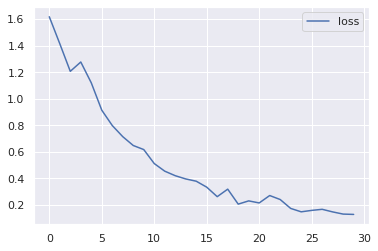

In [10]:
import pandas as pd
his=pd.DataFrame(history.history)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
his.plot(y='loss')
his

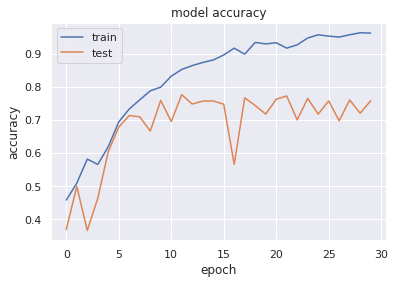

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

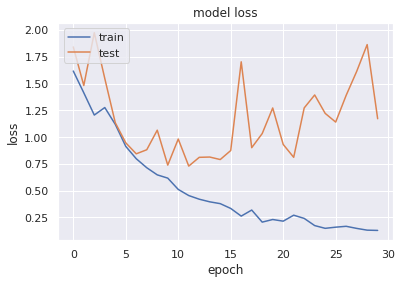

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.5514494e-32]], dtype=float32)

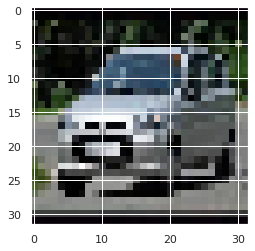

In [15]:
import imageio,cv2
import matplotlib.pyplot as plt
img=imageio.imread('/content/car_.jpeg')
img=cv2.resize(img,(32,32))
plt.imshow(img)
img=img.reshape(1,32,32,3)
img=img/255
model.predict(img)

In [16]:
import numpy as np

np.argmax(model.predict(img))

1

In [ ]:
model.save('cifar10class.h5')

In [ ]:
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck